In [1]:
import importlib
import torch
import torch.nn as nn
import torch.optim as optim
import dataloader
from torchsummary import summary
import config
import model
from torch.optim.lr_scheduler import OneCycleLR
import show_images_from_batch
importlib.reload(model)
importlib.reload(config)
importlib.reload(dataloader)
importlib.reload(show_images_from_batch)

<module 'show_images_from_batch' from 'E:\\TSAI\\EVA_5\\assignment_8\\show_images_from_batch.py'>

In [2]:
net = model.ResNet18().to(config.DEVICE)
criterion = nn.CrossEntropyLoss() #torch.nn.functional.nll_loss
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9)
scheduler = OneCycleLR(optimizer,max_lr=0.5,total_steps=20)
train_loader, test_loader = dataloader.get_iterators()

Files already downloaded and verified
Files already downloaded and verified


In [3]:
summary(net, (3, 32, 32))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

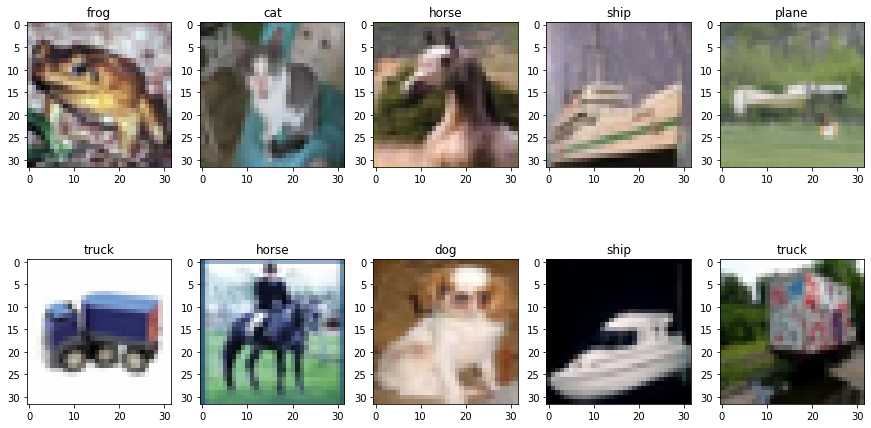

In [4]:
show_images_from_batch.get_images(train_loader)


In [5]:
first_run = model.Trial(
    name="first_run",
    model=net,
    args={
        "epochs": config.EPOCH,
        "train_loader": train_loader,
        "test_loader": test_loader,
        "optimizer": optimizer,
        "device": config.DEVICE,
        "loss_fn": criterion,
        "scheduler": scheduler
    },
)

first_run.run()
print("Done!")

  0%|                                                                                          | 0/782 [00:00<?, ?it/s]

1 / 20


  0%|                                                                                          | 0/782 [00:00<?, ?it/s]


RuntimeError: CUDA out of memory. Tried to allocate 20.00 MiB (GPU 0; 4.00 GiB total capacity; 460.46 MiB already allocated; 2.37 GiB free; 464.00 MiB reserved in total by PyTorch)

In [ ]:
show_images_from_batch.plot_images_by_classification(25, run.model, test_loader, config.DEVICE, misclassified=False)


In [ ]:
show_images_from_batch.plot_images_by_classification(25, run.model, test_loader, config.DEVICE)


In [ ]:
show_images_from_batch.plot_curves_for_trials(run)
